In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-shows/netflix_titles.csv


# **DATA CLEANING PROCESS STARTS HERE**

In [3]:
df = pd.read_csv(os.path.join(dirname, filename))
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
import seaborn as sns

df["Movies"] = [i for i in df["type"] == "Movie"]
df.head()

# **Number of Movies and TV shows**

<Axes: xlabel='type', ylabel='count'>

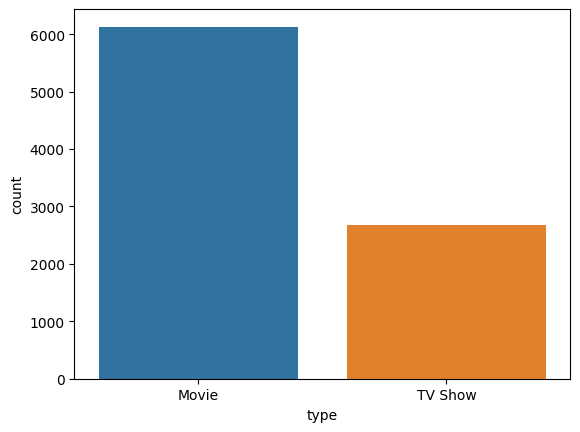

In [5]:
sns.countplot(x='type', data=df)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [7]:
df.shape

(8807, 12)

In [8]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [9]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

so there are null values in the dataset

In [10]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

so filling value of duration with median and the categorical column with mode

In [11]:
df["duration"].fillna(df["duration"].median(),inplace = True)

TypeError: could not convert string to float: '90 min'

In [12]:
df["duration"]

0          90 min
1       2 Seasons
2        1 Season
3        1 Season
4       2 Seasons
          ...    
8802      158 min
8803    2 Seasons
8804       88 min
8805       88 min
8806      111 min
Name: duration, Length: 8807, dtype: object

In [13]:
df["duration"].unique()

array(['90 min', '2 Seasons', '1 Season', '91 min', '125 min',
       '9 Seasons', '104 min', '127 min', '4 Seasons', '67 min', '94 min',
       '5 Seasons', '161 min', '61 min', '166 min', '147 min', '103 min',
       '97 min', '106 min', '111 min', '3 Seasons', '110 min', '105 min',
       '96 min', '124 min', '116 min', '98 min', '23 min', '115 min',
       '122 min', '99 min', '88 min', '100 min', '6 Seasons', '102 min',
       '93 min', '95 min', '85 min', '83 min', '113 min', '13 min',
       '182 min', '48 min', '145 min', '87 min', '92 min', '80 min',
       '117 min', '128 min', '119 min', '143 min', '114 min', '118 min',
       '108 min', '63 min', '121 min', '142 min', '154 min', '120 min',
       '82 min', '109 min', '101 min', '86 min', '229 min', '76 min',
       '89 min', '156 min', '112 min', '107 min', '129 min', '135 min',
       '136 min', '165 min', '150 min', '133 min', '70 min', '84 min',
       '140 min', '78 min', '7 Seasons', '64 min', '59 min', '139 min',
    

In [14]:
df["timing"] =  df.loc[df["type"] == "Movie", "duration"]

In [15]:
df["timing"]

0        90 min
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
8802    158 min
8803        NaN
8804     88 min
8805     88 min
8806    111 min
Name: timing, Length: 8807, dtype: object

there are many NAN values so dropped it

In [16]:
df["timing"] = df["timing"].dropna()

In [17]:
df["timing"]

0        90 min
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
8802    158 min
8803        NaN
8804     88 min
8805     88 min
8806    111 min
Name: timing, Length: 8807, dtype: object

In [18]:
df["timing"] = df["timing"].str.split(" ").str[0]
df["timing"]

0        90
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
8802    158
8803    NaN
8804     88
8805     88
8806    111
Name: timing, Length: 8807, dtype: object

In [19]:
df["timing"] = df["timing"].dropna()

In [20]:
df["timing"]

0        90
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
8802    158
8803    NaN
8804     88
8805     88
8806    111
Name: timing, Length: 8807, dtype: object

In [21]:
df["timing"].isna().sum()

2679

In [22]:
df["final_timing"] = df["timing"].fillna(60)

In [23]:
df["timing"].isna().sum()

2679

In [24]:
df["final_timing"]

0        90
1        60
2        60
3        60
4        60
       ... 
8802    158
8803     60
8804     88
8805     88
8806    111
Name: final_timing, Length: 8807, dtype: object

In [25]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,timing,final_timing
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90,90
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",NaN,60
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,NaN,60
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",NaN,60
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,NaN,60


In [26]:
new_df = df[df['type'] != 'TV Show'].copy()

# Drop the 'type' column from the new DataFrame
new_df.drop('type', axis=1, inplace=True)

In [27]:
new_df.head()

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,timing,final_timing
0,s1,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90,90
6,s7,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,91,91
7,s8,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",125,125
9,s10,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,104,104
12,s13,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,127,127


In [28]:
new_df.drop('timing',axis=1,inplace=True)

In [29]:
new_df.drop('timimg',axis=1,inplace=True)

KeyError: "['timimg'] not found in axis"

In [ ]:
new_df.head()

In [ ]:
new_df.drop('date_added',axis=1,inplace=True)

In [ ]:
new_df.drop('show_id',axis=1,inplace=True)

In [30]:
new_df.head()

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,final_timing
0,s1,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90
6,s7,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,91
7,s8,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",125
9,s10,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,104
12,s13,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,127


In [31]:
new_df.rename(columns={'release_year':'Year'},inplace=True)

In [32]:
new_df.head()

,show_id,title,director,cast,country,date_added,Year,rating,duration,listed_in,description,final_timing
0,s1,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90
6,s7,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,91
7,s8,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",125
9,s10,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,104
12,s13,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,127


In [33]:
new_df.isnull().sum()

show_id           0
title             0
director        188
cast            475
country         440
date_added        0
Year              0
rating            2
duration          3
listed_in         0
description       0
final_timing      0
dtype: int64

In [34]:
new_df["country"].unique()

array(['United States', nan,
       'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia',
       'Germany, Czech Republic', 'India', 'United States, India, France',
       'China, Canada, United States',
       'South Africa, United States, Japan', 'Japan', 'Nigeria',
       'Spain, United States', 'France', 'United Kingdom, United States',
       'United Kingdom, Australia, France',
       'United Kingdom, Australia, France, United States',
       'United States, Canada', 'Germany, United States',
       'South Africa, United States', 'United States, Mexico',
       'United States, Italy, France, Japan',
       'United States, Italy, Romania, United Kingdom',
       'Australia, United States', 'Argentina, Venezuela',
       'United States, United Kingdom, Canada', 'China, Hong Kong',
       'Canada', 'Hong Kong', 'United States, China, Hong Kong',
       'Italy, United States', 'United States, Germany',
       'United Kingdom, Canada, United States',
       'United 

In [35]:
new_df["country"].isna().sum()

440

In [36]:
new_df["country"].mode()

0    United States
Name: country, dtype: object

In [37]:
new_df["country"] = new_df["country"].fillna(new_df["country"].mode()[0])

In [38]:
new_df.isnull().sum()

show_id           0
title             0
director        188
cast            475
country           0
date_added        0
Year              0
rating            2
duration          3
listed_in         0
description       0
final_timing      0
dtype: int64

In [39]:
new_df.head()

,show_id,title,director,cast,country,date_added,Year,rating,duration,listed_in,description,final_timing
0,s1,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90
6,s7,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,91
7,s8,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",125
9,s10,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,104
12,s13,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,127


In [40]:
new_df["rating"].unique()

array(['PG-13', 'PG', 'TV-MA', 'TV-PG', 'TV-14', 'TV-Y', 'R', 'TV-G',
       'TV-Y7', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [41]:
numeric_rating_rows = new_df[new_df['rating'].str.match(r'\d+ min', na=False)]

# Display these rows for inspection
print("FVdvdv",numeric_rating_rows)

# Based on inspection, decide whether to correct, move to a new column, or remove these rows
# For example, if you want to remove rows with numeric values in the 'rating' column:
new_df = new_df[~new_df['rating'].str.match(r'\d+ min', na=False)].copy()

FVdvdv      show_id                                 title    director        cast  \
5541   s5542                       Louis C.K. 2017  Louis C.K.  Louis C.K.   
5794   s5795                 Louis C.K.: Hilarious  Louis C.K.  Louis C.K.   
5813   s5814  Louis C.K.: Live at the Comedy Store  Louis C.K.  Louis C.K.   

            country          date_added  Year  rating duration listed_in  \
5541  United States       April 4, 2017  2017  74 min      NaN    Movies   
5794  United States  September 16, 2016  2010  84 min      NaN    Movies   
5813  United States     August 15, 2016  2015  66 min      NaN    Movies   

                                            description final_timing  
5541  Louis C.K. muses on religion, eternal love, gi...           60  
5794  Emmy-winning comedy writer Louis C.K. brings h...           60  
5813  The comic puts his trademark hilarious/thought...           60  


In [42]:
new_df["rating"].unique()

array(['PG-13', 'PG', 'TV-MA', 'TV-PG', 'TV-14', 'TV-Y', 'R', 'TV-G',
       'TV-Y7', 'G', 'NC-17', 'NR', nan, 'TV-Y7-FV', 'UR'], dtype=object)

In [43]:
rating_mapping = {
    'PG-13': 1,
    'PG': 2,
    'TV-MA': 3,
    'TV-PG': 4,
    'TV-14': 5,
    'TV-Y': 6,
    'R': 7,
    'TV-G': 8,
    'TV-Y7': 9,
    'G': 10,
    'NC-17': 11,
    'NR': 12,
    'TV-Y7-FV': 13,
    'UR': 14,
    # Add more mappings if needed
}

# Map the 'rating' column to numerical values
new_df['numeric_rating'] = new_df['rating'].map(rating_mapping)


In [44]:
new_df.head()

,show_id,title,director,cast,country,date_added,Year,rating,duration,listed_in,description,final_timing,numeric_rating
0,s1,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90,1.0
6,s7,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,91,2.0
7,s8,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",125,3.0
9,s10,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,104,1.0
12,s13,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,127,3.0


In [45]:
new_df.isnull().sum()

show_id             0
title               0
director          188
cast              475
country             0
date_added          0
Year                0
rating              2
duration            0
listed_in           0
description         0
final_timing        0
numeric_rating      2
dtype: int64

In [46]:
new_df["numeric_rating"].unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., nan,
       13., 14.])

In [47]:
new_df["numeric_rating"] = new_df["numeric_rating"].fillna(new_df["numeric_rating"].median())

In [48]:
new_df["numeric_rating"].unique()


array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14.])

In [49]:
new_df.isnull().sum()

show_id             0
title               0
director          188
cast              475
country             0
date_added          0
Year                0
rating              2
duration            0
listed_in           0
description         0
final_timing        0
numeric_rating      0
dtype: int64

In [50]:
new_df["cast"].isna()

0        True
6       False
7       False
9       False
12      False
        ...  
8801    False
8802    False
8804    False
8805    False
8806    False
Name: cast, Length: 6128, dtype: bool

In [51]:
new_df.dropna(subset=['cast'], inplace=True)

In [53]:
new_df.isnull().sum()

show_id             0
title               0
director          134
cast                0
country             0
date_added          0
Year                0
rating              2
duration            0
listed_in           0
description         0
final_timing        0
numeric_rating      0
dtype: int64

In [54]:
new_df.dropna(subset=['director'], inplace=True)

In [55]:
new_df.isnull().sum()

show_id           0
title             0
director          0
cast              0
country           0
date_added        0
Year              0
rating            1
duration          0
listed_in         0
description       0
final_timing      0
numeric_rating    0
dtype: int64

rating column does not matter to me coz i have numeric_rating :)

# **SO DATA CLEANING PROCESS HAS BEEN DONE HERE :)**

In [59]:
new_df.describe()

,Year,numeric_rating
count,5519.000000,5519.000000
mean,2012.828411,4.314006
std,9.654492,2.155887
min,1942.000000,1.000000
25%,2011.000000,3.000000
50%,2016.000000,4.000000
75%,2018.000000,5.000000
max,2021.000000,14.000000


In [61]:
new_df.head()

,show_id,title,director,cast,country,date_added,Year,rating,duration,listed_in,description,final_timing,numeric_rating
6,s7,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,91,2.0
7,s8,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",125,3.0
9,s10,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,104,1.0
12,s13,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,127,3.0
13,s14,Confessions of an Invisible Girl,Bruno Garotti,"Klara Castanho, Lucca Picon, Júlia Gomes, Marc...",United States,"September 22, 2021",2021,TV-PG,91 min,"Children & Family Movies, Comedies",When the clever but socially-awkward Tetê join...,91,4.0


In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

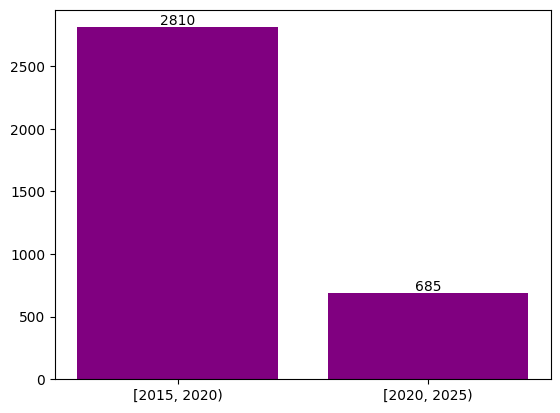

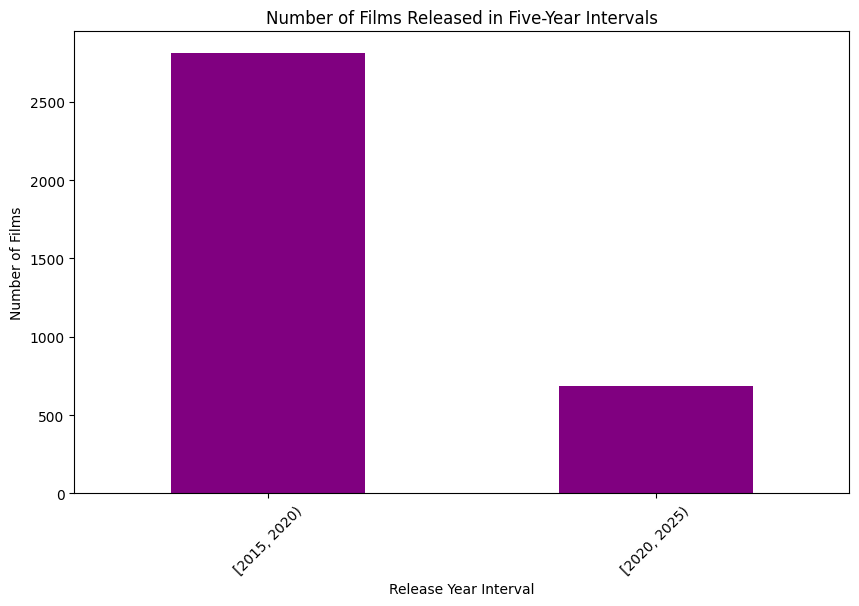

In [86]:
new_df['release_year_grouped'] = pd.cut(new_df['Year'], bins=range(2015, 2026, 5), right=False)
films_per_interval = new_df['release_year_grouped'].value_counts().sort_index()
bars = plt.bar(films_per_interval.index.astype(str), films_per_interval.values, color='purple')

# Display values on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, round(yval, 2), ha='center', va='bottom')

# Plot the graph
plt.figure(figsize=(10, 6))
films_per_interval.plot(kind='bar', color='purple')
plt.title('Number of Films Released in Five-Year Intervals')
plt.xlabel('Release Year Interval')
plt.ylabel('Number of Films')
plt.xticks(rotation=45)
plt.show()

In [87]:
new_df.head()

,show_id,title,director,cast,country,date_added,Year,rating,duration,listed_in,description,final_timing,numeric_rating,release_year_grouped
6,s7,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,91,2.0,"[2020.0, 2025.0)"
7,s8,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",125,3.0,NaN
9,s10,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,104,1.0,"[2020.0, 2025.0)"
12,s13,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,127,3.0,"[2020.0, 2025.0)"
13,s14,Confessions of an Invisible Girl,Bruno Garotti,"Klara Castanho, Lucca Picon, Júlia Gomes, Marc...",United States,"September 22, 2021",2021,TV-PG,91 min,"Children & Family Movies, Comedies",When the clever but socially-awkward Tetê join...,91,4.0,"[2020.0, 2025.0)"


TypeError: float() argument must be a string or a real number, not 'pandas._libs.interval.Interval'

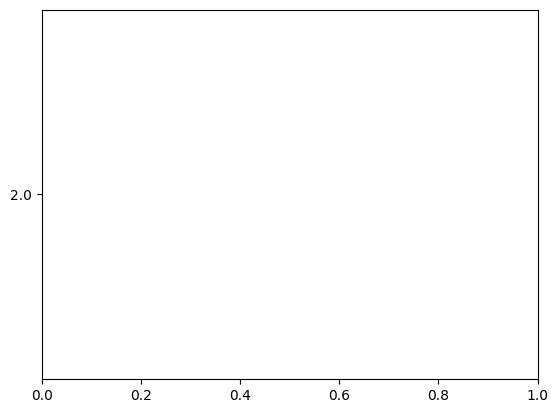

In [90]:
histo = plt.bar(new_df["release_year_grouped"],new_df["numeric_rating"].astype(str),color="pink")
for hist in histo:
    yval = hist.get_height()
    plt.text(hist.get_x() + hist.get_width()/2, yval + 0.05, round(yval, 2), ha='center', va='bottom')
plt.show()

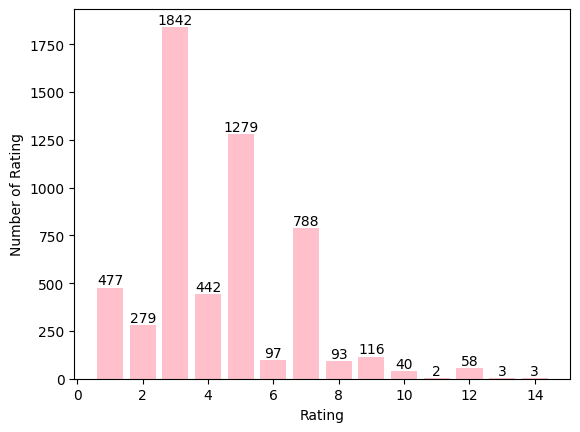

In [97]:


histo = plt.bar(new_df["numeric_rating"].value_counts().sort_index().index, new_df["numeric_rating"].value_counts().sort_index(), color="pink")

# Display numeric_rating values on top of each bar
for hist in histo:
    yval = hist.get_height()
    plt.text(hist.get_x() + hist.get_width() / 2, yval + 0.05, round(yval, 2), ha='center', va='bottom')


plt.xlabel('Rating')
plt.ylabel('Number of Rating')
plt.show()

In [93]:
new_df["numeric_rating"].value_counts().sort_index()

numeric_rating
1.0      477
2.0      279
3.0     1842
4.0      442
5.0     1279
6.0       97
7.0      788
8.0       93
9.0      116
10.0      40
11.0       2
12.0      58
13.0       3
14.0       3
Name: count, dtype: int64

In [56]:
import keras
import keras_nlp
import numpy as np


Using TensorFlow backend


In [57]:
features = ["The quick brown fox jumped.", "I forgot my homework."]
labels = [0, 3]

# Pretrained classifier.
classifier = keras_nlp.models.BertClassifier.from_preset(
    "bert_base_multi",
    num_classes=4,
)
classifier.fit(x=features, y=labels, batch_size=2)
classifier.predict(x=features, batch_size=2)

# Re-compile (e.g., with a new learning rate).
classifier.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(5e-5),
    jit_compile=True,
)
# Access backbone programmatically (e.g., to change `trainable`).
classifier.backbone.trainable = False
# Fit again.
classifier.fit(x=features, y=labels, batch_size=2)


Attaching 'config.json' from model 'keras/bert/keras/bert_base_multi/2' to your Kaggle notebook...
Attaching 'config.json' from model 'keras/bert/keras/bert_base_multi/2' to your Kaggle notebook...
Attaching 'model.weights.h5' from model 'keras/bert/keras/bert_base_multi/2' to your Kaggle notebook...
/opt/conda/lib/python3.10/site-packages/keras_nlp/src/models/backbone.py:37: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return id(getattr(self, attr)) not in self._functional_layer_ids
/opt/conda/lib/python3.10/site-packages/keras_nlp/src/models/backbone.py:37: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return id(getattr(self, attr)) not in self._functional_layer_ids
Attaching 'tokenizer.json' from model 'keras/bert/keras/bert_base_multi/2' to your Kaggl

1/1 [==============================] - 78s 78s/step - loss: 1.0122


In [58]:
features = {
    "token_ids": np.ones(shape=(2, 12), dtype="int32"),
    "segment_ids": np.array([[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0]] * 2),
    "padding_mask": np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0]] * 2),
}
labels = [0, 3]

# Pretrained classifier without preprocessing.
classifier = keras_nlp.models.BertClassifier.from_preset(
    "bert_base_multi",
    num_classes=4,
    preprocessor=None,
)
classifier.fit(x=features, y=labels, batch_size=2)


Attaching 'config.json' from model 'keras/bert/keras/bert_base_multi/2' to your Kaggle notebook...
Attaching 'config.json' from model 'keras/bert/keras/bert_base_multi/2' to your Kaggle notebook...
Attaching 'model.weights.h5' from model 'keras/bert/keras/bert_base_multi/2' to your Kaggle notebook...


1/1 [==============================] - 96s 96s/step - loss: 1.3078 - sparse_categorical_accuracy: 0.5000
